In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import ttest_ind
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
lda_matrix = pd.read_csv('recipe_lda.csv')
lda_matrix.set_index('title', inplace=True)
lda_matrix.head(1)

,seafood,salad,cream_based,asian,baking_goods,meat,italian,mexican
title,,,,,,,,
Chip Truck Fries,0.020844,0.377264,0.02084,0.497684,0.02084,0.02084,0.020843,0.020845


In [3]:
lda_matrix.shape

(4776, 8)

# Content-based Recommender 
## Cosine Similarity

I want to use cosine similarity to build a content-based recommender system. 

In [4]:
lda_array = lda_matrix.to_numpy()

In [5]:
lda_array

array([[0.02084364, 0.3772639 , 0.02083951, ..., 0.02084048, 0.02084331,
        0.02084466],
       [0.01020898, 0.37875134, 0.01020757, ..., 0.01021254, 0.01020785,
        0.55999607],
       [0.9102419 , 0.01282637, 0.01282241, ..., 0.01282223, 0.01282171,
        0.01282298],
       ...,
       [0.01470774, 0.01470652, 0.01470755, ..., 0.01470723, 0.01470679,
        0.01470659],
       [0.0172441 , 0.0172433 , 0.01724346, ..., 0.01724468, 0.01724358,
        0.01724454],
       [0.01136432, 0.0113641 , 0.01136472, ..., 0.01136439, 0.01136423,
        0.01136412]])

In [6]:
lda_array.shape

(4776, 8)

In [7]:
cosine_sim = cosine_similarity(lda_array)

In [8]:
cosine_sim.shape

(4776, 4776)

In [9]:
df_sim = pd.DataFrame(data=cosine_sim, 
                      index=lda_matrix.index.tolist(), 
                      columns=lda_matrix.index.tolist())
df_sim.head()

,Chip Truck Fries,Irish Bacon And Cabbage Soup,Quick Salmon Salad,Bills Seasoned Ketchup,Celery Salad,Jens Heavenly Egg Salad,Black Bean And Corn Quesadillas,Mimis Zucchini Pie,Tomato Mint Quinoa Salad,Nutty Brown Rice Salad,...,Urban Legend Chocolate Chip Cookies,Monster Cookies Ii,Anzac Biscuits I,No Bake Cookies I,Megans Granola,No Bake Choco Peanut Oatmeal Cookies,Maine Venison Stew,Buttertart Squares,Japanese Sushi Rice,Oatmeal Chocolate Chip Cookies I
Chip Truck Fries,1.000000,0.379111,0.055241,0.055239,0.588063,0.281271,0.052953,0.036981,0.033266,0.045826,...,0.033260,0.033260,0.071229,0.083368,0.050412,0.106832,0.046982,0.058823,0.063820,0.052525
Irish Bacon And Cabbage Soup,0.379111,1.000000,0.035679,0.035688,0.542467,0.247154,0.703192,0.016775,0.827765,0.450614,...,0.015089,0.015089,0.050672,0.062061,0.031155,0.084098,0.021319,0.039039,0.043723,0.033135
Quick Salmon Salad,0.055241,0.035679,1.000000,0.029329,0.017406,0.931289,0.022410,0.015649,0.014078,0.019392,...,0.014076,0.014076,0.040428,0.048868,0.025975,0.065191,0.019885,0.031815,0.035282,0.027442
Bills Seasoned Ketchup,0.055239,0.035688,0.029329,1.000000,0.017407,0.045081,0.022416,0.015653,0.014082,0.019398,...,0.014079,0.014079,0.040432,0.048863,0.025978,0.065175,0.682682,0.031817,0.035286,0.027445
Celery Salad,0.588063,0.542467,0.017406,0.017407,1.000000,0.368576,0.000000,0.272725,0.000000,0.233108,...,0.000000,0.000000,0.030091,0.039734,0.013580,0.058408,0.000000,0.020248,0.024210,0.015254


In [10]:
# creating a Series for recipe titles
indices = pd.Series(lda_matrix.index)

In [11]:
# define a function to take in recipe title and return the top n recommended recipes
def recommender(title, df=lda_matrix, cosine_sim=cosine_sim, top_n=10):
    """
    Content-based recommender based on cosine similarity
    """
    # initialize an empty list of recommended recipes
    top_recipes = []
    
    # get the index of the recipe that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)

    # getting the idx of the n most similar recipes
    top_idx = score_series.iloc[1:top_n+1].index.tolist()
    
    # get the title of the top n matching recipes
    for i in top_idx:
        top_recipes.append(df.index[i])
        
    return top_recipes

In [12]:
options = ['Shrimp Scampi']
rec_recipes = []
for title in options:
    top_recipes = recommender(title, top_n=100)
    rec_recipes.extend(top_recipes)

In [13]:
len(rec_recipes)

100

# Optimizaiton

I need to create another dataframe to store reipce title, serving, cook time, calorie, fat, protein, carbohydrate, fat ratio, protein ratio, carbohydrate ratio and link to optimize the recommendation.

In [14]:
df = pd.read_csv('recipe_clean.csv')
df.head(1)

,link,title,ratings,num_reviews,ingredients,servings,cook_time,calorie,fat_g,carb_g,protein_g,cholesterol_mg,sodium_mg
0,https://www.allrecipes.com/recipe/100164/chip-...,Chip Truck Fries,4.44,44,"['6 baking potatoes, cut into 1/4 inch slices'...",4.0,60,369.0,14.0,56.3,6.5,0.0,478.0


In [15]:
df.shape

(4776, 13)

In [16]:
# add macronutrient ratios
df['fat_ratio'] = np.round(df.fat_g * 9 / df.calorie, 2)
df['protein_ratio'] = np.round(df.protein_g * 4 / df.calorie, 2)
df['carb_ratio'] = 1 - df['fat_ratio'] - df['protein_ratio']
df.head(1)

,link,title,ratings,num_reviews,ingredients,servings,cook_time,calorie,fat_g,carb_g,protein_g,cholesterol_mg,sodium_mg,fat_ratio,protein_ratio,carb_ratio
0,https://www.allrecipes.com/recipe/100164/chip-...,Chip Truck Fries,4.44,44,"['6 baking potatoes, cut into 1/4 inch slices'...",4.0,60,369.0,14.0,56.3,6.5,0.0,478.0,0.34,0.07,0.59


In [17]:
# create a new df holding essential info 
df_nutrient = df[['title','ratings','cook_time','servings','calorie','fat_g','protein_g','carb_g',
                  'fat_ratio','protein_ratio','carb_ratio','link']]
df_nutrient.head(1)

,title,ratings,cook_time,servings,calorie,fat_g,protein_g,carb_g,fat_ratio,protein_ratio,carb_ratio,link
0,Chip Truck Fries,4.44,60,4.0,369.0,14.0,6.5,56.3,0.34,0.07,0.59,https://www.allrecipes.com/recipe/100164/chip-...


In [18]:
df_nutrient.set_index('title', inplace=True)
df_nutrient.head(1)

,ratings,cook_time,servings,calorie,fat_g,protein_g,carb_g,fat_ratio,protein_ratio,carb_ratio,link
title,,,,,,,,,,,
Chip Truck Fries,4.44,60,4.0,369.0,14.0,6.5,56.3,0.34,0.07,0.59,https://www.allrecipes.com/recipe/100164/chip-...


In [19]:
# save df_nutrient
df_nutrient.to_csv('recipe_nutrient.csv')

In [20]:
def print_rec(df, i):
    """
    Print the recommended recipe titles, portion, calorie and link
    """
    recipe = df['recipe'][i]
    serving = df['serving'][i]    
    calorie = df['calorie'][i]
    link = df['link'][i]
    print(f'Day {i+1} : {recipe}')
    print(f'Your portion: {serving}')
    print(f'Calorie: {calorie}')
    print(link)

In [21]:
def plot_nutrient(df, i):
    """
    Plot a pie chart of macronutrient distribution 
    """
    labels = ['Carbohydrate', 'Protein', 'Fat']
    sizes = [df['carb ratio'][i], df['protein ratio'][i], df['fat ratio'][i]]
    colors = ['lightcoral', 'lightskyblue', 'gold']

    # plot
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90, counterclock=False)
    plt.axis('square')
    plt.show();

In [22]:
# define a function to take in recommended recipe list and
# filter for appropriate nutrition and cook time
def optimizer(rec_recipes, protein_lower, calorie, df=df_nutrient, time='off'):
    """
    Optimize recommended recipes based on calorie need, fat ratio, minimum protein requirement and cook time
    """
    protein_lower = protein_lower # set protein min
    fat_limit = 0.40 # set fat_ratio limit
    calorie_limit = calorie # set calorie limit 

    # create a new rec dict
    new_rec = {'recipe': [], 'link': [], 'serving': [], 'calorie': [], 'protein': [], 
               'fat ratio': [], 'protein ratio': [], 'carb ratio': []}

    while len(rec_recipes) > 0:
        if len(new_rec['recipe']) == 5:
            df = pd.DataFrame(new_rec, index=[['Day 1','Day 2','Day 3', 'Day 4', 'Day 5']])
            print('Your 5-day dinner plan is ready.')
            for i in range(5):
                print_rec(df, i)
                plot_nutrient(df, i)
            return 

        recipe = np.random.choice(rec_recipes)
        rec_recipes.remove(recipe)
        
        # check time
        if time == 'on':
            if df.loc[recipe].cook_time > 30 or df.loc[recipe].cook_time == 0:
                continue
            
        # check fat
        if df.loc[recipe].fat_ratio > fat_limit:
            continue
            
        # check calorie
        if df.loc[recipe].calorie > calorie_limit:
            portion = np.round(calorie_limit/df.loc[recipe].calorie, 2) 
            protein = np.round(df.loc[recipe].protein_g * portion)
            
            # check protein
            if protein < protein_lower:
                continue
            calorie = np.round(df.loc[recipe].calorie * portion) 
            serving = np.round(portion/df.loc[recipe].servings, 1)
            fat_ratio = df.loc[recipe].fat_ratio
            protein_ratio = df.loc[recipe].protein_ratio            
            carb_ratio = df.loc[recipe].carb_ratio            
            link = df.loc[recipe].link            
            new_rec['recipe'].append(recipe)
            new_rec['link'].append(link)
            new_rec['serving'].append(serving)
            new_rec['calorie'].append(calorie)
            new_rec['protein'].append(protein)
            new_rec['fat ratio'].append(fat_ratio)
            new_rec['protein ratio'].append(protein_ratio)
            new_rec['carb ratio'].append(carb_ratio)
            
        else:
            portion = np.round(calorie_limit/df.loc[recipe].calorie, 2) 
            protein = np.round(df.loc[recipe].protein_g * portion)
            
            # check protein
            if protein < protein_lower:
                continue
            calorie = np.round(df.loc[recipe].calorie * portion) 
            serving = np.round(portion/df.loc[recipe].servings, 1)
            fat_ratio = df.loc[recipe].fat_ratio
            protein_ratio = df.loc[recipe].protein_ratio            
            carb_ratio = df.loc[recipe].carb_ratio            
            link = df.loc[recipe].link
            new_rec['recipe'].append(recipe)
            new_rec['link'].append(link)
            new_rec['serving'].append(serving)
            new_rec['calorie'].append(calorie)
            new_rec['protein'].append(protein)
            new_rec['fat ratio'].append(fat_ratio)
            new_rec['protein ratio'].append(protein_ratio)
            new_rec['carb ratio'].append(carb_ratio)

    print('Running out of recipes. Please start over and choose more preferred meals.')
    return

Your 5-day dinner plan is ready.
Day 1 : Robins Quinoa With Mushrooms And Spinach
Your portion: 0.4
Calorie: 498.0
https://www.allrecipes.com/recipe/139276/robins-quinoa-with-mushrooms-and-spinach/


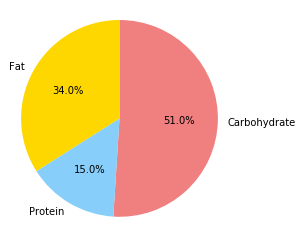

Day 2 : Healthy Warm Farro Salad
Your portion: 0.5
Calorie: 499.0
https://www.allrecipes.com/recipe/239722/healthy-warm-farro-salad/


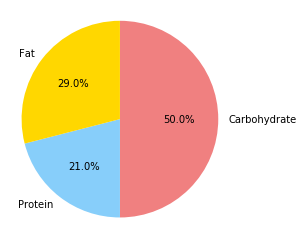

Day 3 : Linguine Pasta With Shrimp And Tomatoes
Your portion: 0.2
Calorie: 499.0
https://www.allrecipes.com/recipe/139510/linguine-pasta-with-shrimp-and-tomatoes/


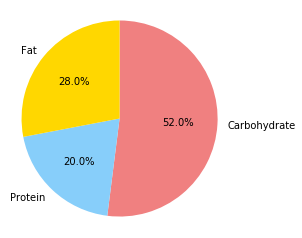

Day 4 : Exchange Gang Pasta With Shrimp
Your portion: 0.2
Calorie: 502.0
https://www.allrecipes.com/recipe/187351/exchange-gang-pasta-with-shrimp/


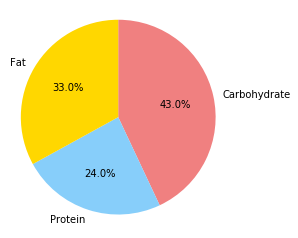

Day 5 : Shrimp Sausage And Fish Jambalaya
Your portion: 0.1
Calorie: 498.0
https://www.allrecipes.com/recipe/220219/shrimp-sausage-and-fish-jambalaya/


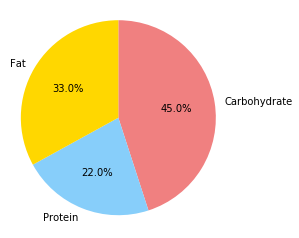

In [23]:
optimizer(rec_recipes, 16, 500, df_nutrient)

# Validation 

For validation, I want to compare the content-based recommender with the one only recommends top rated recipes. 

First I need to compute the mean similarity of 3 user preferred recipes and 5 recommended recipes (filtered for calorie and nutrition). As comparison, I will compute the mean similarity of the same 3 user preferred recipes and 5 top rated recipes (filtered for calorie and nutrition). I will repeat this process for 1000 times and compare the result.

In [24]:
def mean_similarity(title_list, df=lda_matrix):
    """
    Compute mean cosine similarity of two or more recipes
    """    
    array = lda_matrix.loc[title_list,:].to_numpy()
    cosine_sim = cosine_similarity(array)
    n_recipe = len(title_list)
    if n_recipe == 2:
        sim_score = np.round(cosine_sim[0, 1], 2)
    elif n_recipe > 2:
        sim_score = np.round(cosine_sim[0, 1:n_recipe].mean(), 2)
    else:
        print('Please choose at least two recipes to compare.')
    
    return sim_score

In [25]:
def optimizer_valid(rec_recipes, df=df_nutrient):
    """
    An optimizer used for validation
    """
    protein_lower = 17.2 # set protein min
    fat_limit = 0.40 # set fat_ratio limit
    calorie_limit = 467 # set calorie limit 

    # create a recipe list
    new_rec = []

    while len(rec_recipes) > 0:
        if len(new_rec) == 5:
            return new_rec

        recipe = np.random.choice(rec_recipes)
        rec_recipes.remove(recipe)      
   
        # check fat
        if df.loc[recipe].fat_ratio > fat_limit:
            continue
            
        # check calorie
        if df.loc[recipe].calorie > calorie_limit:
            portion = np.round(calorie_limit/df.loc[recipe].calorie, 2) 
            protein = np.round(df.loc[recipe].protein_g * portion)
            
            # check protein
            if protein < protein_lower:
                continue
            new_rec.append(recipe)
        else:
            portion = np.round(calorie_limit/df.loc[recipe].calorie, 2) 
            protein = np.round(df.loc[recipe].protein_g * portion)
            
            # check protein
            if protein < protein_lower:
                continue
            new_rec.append(recipe)

    print('Running out of recipes.')
    return

In [26]:
def validation(df1=lda_matrix, df2=df_nutrient):
    """
    Compare
    Compute mean cosine similarity of 3 randomly picked recipes and 
    """
    # randomly pick 3 recipes to mimic the user behavior
    random_recipes = np.random.choice(df1.index.tolist(), 3)
    
    # compute content-based similarity
    ## apply recommender
    rec_recipes = []
    for title in random_recipes:
        rec_recipes.extend(recommender(title, top_n=100))

    ## apply optimizer
    content_recipes = optimizer_valid(rec_recipes)

    ## calculate mean similarity 
    content_sims = []
    for title in random_recipes:
        content_recipes.append(title)
        content_sim = mean_similarity(content_recipes)
        content_sims.append(content_sim)
    
    content_mean = np.mean(content_sims)
    
    # compute rank-based similarity
    ## find the top 300 rated recipes
    top_recipes = df2.sort_values(by='ratings', ascending=False)[:300].index.tolist()
    
    ## apply optimizer
    rank_recipes = optimizer_valid(top_recipes)
    
    ## calculate mean similarity 
    rank_sims = []
    for title in random_recipes:
        rank_recipes.append(title)
        rank_sim = mean_similarity(rank_recipes)
        rank_sims.append(rank_sim)
    
    rank_mean = np.mean(rank_sims)
        
    return np.round(content_mean, 2), np.round(rank_mean, 2)

In [27]:
validation()

(0.53, 0.18)

In [28]:
content_means = []
rank_means = []
for _ in range(1000):
    try:
        content_mean, rank_mean = validation()
        content_means.append(content_mean)
        rank_means.append(rank_mean)
    except AttributeError:
        pass

/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_sca

/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_sca

/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_sca

In [29]:
len(content_means), len(rank_means)

(1000, 1000)

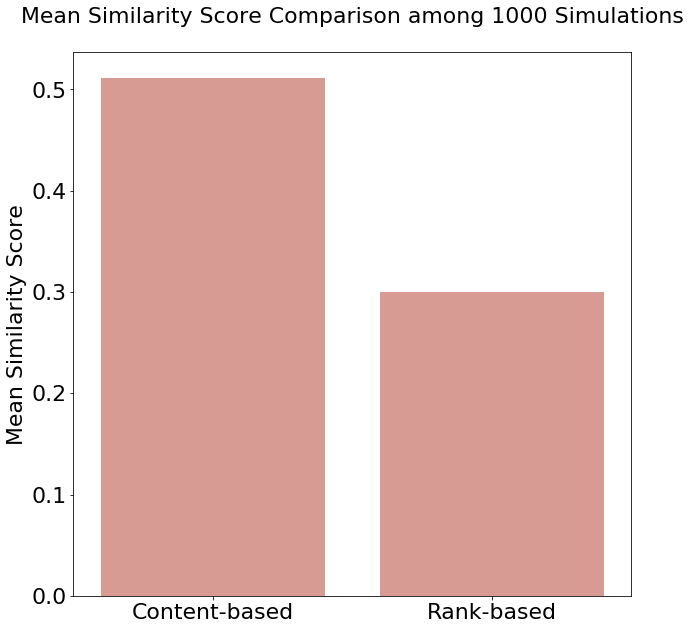

In [30]:
# plot the result
x = ['Content-based', 'Rank-based']
y = [np.mean(content_means), np.mean(rank_means)]

plt.figure(figsize=(10,10))
sns.barplot(x, y, color='salmon', saturation=.5)
plt.title('Mean Similarity Score Comparison among 1000 Simulations\n', fontsize='22')
plt.xticks([0, 1], ['Content-based', 'Rank-based'], fontsize='22')
plt.yticks(np.arange(0, 0.6, 0.1), fontsize='22')
plt.ylabel('Mean Similarity Score', fontsize='22');

As a result, the content-based recommender performs better in recommending similar recipes.

In [31]:
# calculate p value using t-test
ttest_ind(content_means, rank_means)

Ttest_indResult(statistic=25.671544904306547, pvalue=7.530019579553935e-126)

In [32]:
print(f'Mean similarity of content-based recommender: {np.round(np.mean(content_means), 2)}')
print(f'Mean similarity of rank-based recommender: {np.round(np.mean(rank_means), 2)}')

Mean similarity of content-based recommender: 0.51
Mean similarity of rank-based recommender: 0.3


References: 

https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243

https://www.cdc.gov/healthyweight/losing_weight/index.html

https://www.ncbi.nlm.nih.gov/books/NBK56068/table/summarytables.t4/?report=objectonly

https://health.gov/our-work/food-nutrition/2015-2020-dietary-guidelines/guidelines/appendix-7/